<a href="https://colab.research.google.com/github/mzakyi/Data_Science_Project/blob/main/Machine%20Learning%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Project

In this project, I built and evaluated machine learning models to predict molecular solubility (logS) using molecular descriptors.

**Data Loading & Preparation**
1. I loaded the dataset (delaney_solubility_with_descriptors.csv) containing molecular descriptors and solubility values.
2. Then I separated the data into features (X) and target (y), with logS as the target.
3. And then split the dataset into training (80%) and testing (20%) sets to evaluate model performance.

**Model Building & Training**

**Created a Linear Regression Model (LR):**
1. I trained a Linear Regression model on the training set.
2. Generated predictions for both training and testing sets.
3. And then evaluated the model using Mean Squared Error (MSE) and
R² score.

**Created a Random Forest Model (RF):**
1. I trained a Random Forest Regressor (with max_depth=2 and random_state=100).
2. Generated predictions for the training and testing sets.
3. Then evaluated this model using MSE and R² score.

**Evaluation & Compared the Models against each other.**
1. I created dataframes to summarize the results for each model.
2. Then combined them into one dataframe to directly compare Linear Regression and Random Forest performance.

**Visualizing Experimental vs. Predicted values -- Using matplotlib.pyplot**
1. I visualized the experimental vs. predicted solubility values for the Linear Regression model.
2. I added a regression line to show the relationship between actual and predicted values.

# Load Data

In [3]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/delaney_solubility_with_descriptors.csv')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


# Data Preparation

## Data Separation as X and Y

In [4]:
y = df['logS']
y

,logS
0,-2.180
1,-2.000
2,-1.740
3,-1.480
4,-3.040
...,...
1139,1.144
1140,-4.925
1141,-3.893
1142,-3.790


In [5]:
x = df.drop('logS', axis =1)
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


## Data Splitting

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=100)

In [7]:
x_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
107,3.14280,112.216,5.0,0.000000
378,-2.07850,142.070,0.0,0.000000
529,-0.47730,168.152,0.0,0.000000
546,-0.86740,154.125,0.0,0.000000
320,1.62150,100.161,2.0,0.000000
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


In [8]:
x_test

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
822,2.91000,172.268,7.0,0.000000
118,7.27400,360.882,1.0,0.666667
347,1.94040,145.161,0.0,0.909091
1123,1.98640,119.378,0.0,0.000000
924,1.70062,108.140,0.0,0.750000
...,...,...,...,...
1114,1.76210,478.513,4.0,0.000000
427,6.32820,276.338,0.0,1.000000
711,0.04430,218.205,5.0,0.000000
4,2.91890,187.375,1.0,0.000000


#Model Building


## Linear Regression Model



### **Training the Model**

In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

### **Applying the model to make predictions**

In [10]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [11]:
print(y_lr_train_pred) ##This represents the 80% of the data

[-2.83668969  0.84208401 -0.50930302 -0.13058053 -1.6269208  -2.86103037
 -2.32208333 -4.16684323 -5.04235077 -2.29737009 -3.15082845 -4.33037208
 -1.43700682 -2.59060064 -7.09025955 -2.32734557 -4.19073421 -2.63904005
 -3.58104074 -3.75929058 -2.5501665  -3.26968347 -2.78911367 -2.69251051
 -0.77437547 -6.61955792 -2.99084623 -2.36975061 -7.18167736 -1.52816491
 -4.81736265 -0.86996608 -7.09025955 -1.87404275 -2.58013247 -4.80953284
 -4.17454084 -1.95444152 -3.50503339 -2.7411418  -1.87131835 -2.45270806
 -3.07252433 -1.48988982 -3.98778754 -1.35216679 -0.16932277 -6.05237002
 -3.29550658  0.30513174 -3.25501463 -5.31993586 -0.4733928  -4.79180882
 -5.82486323 -2.70343539 -3.70838271 -2.4987341  -2.12301018 -3.11393974
 -2.79842053 -1.38274662 -4.3267103  -3.57778946 -3.42356884 -9.15826626
 -6.52588866 -1.75832085 -4.97842312 -1.59255758 -1.91317252 -2.81075595
 -1.14056747 -1.6326702  -1.6269208  -5.33227425 -3.88805074  0.70432882
 -3.99288096 -2.22595859 -2.63405871 -1.80643013 -4

In [12]:
print(y_lr_test_pred) ##This represents the 20% of the data

[-3.05722870e+00 -7.77785827e+00 -2.55016650e+00 -2.01523582e+00
 -2.06375990e+00 -9.99672215e-01 -5.94603364e-01 -5.53626003e-01
 -5.72200956e+00 -3.94006681e+00 -3.95496755e+00 -2.29737009e+00
 -1.48980354e+00 -1.48988982e+00 -4.64510806e+00 -1.90396018e+00
 -1.51566313e+00 -3.16424605e+00 -3.70863920e+00 -5.58105660e+00
 -3.25038467e+00 -5.04235077e+00 -5.69194881e+00 -2.14339849e+00
 -4.35689341e+00 -5.03964756e+00 -3.10383618e+00 -4.40286964e+00
 -4.21276272e+00  5.56508349e-01 -1.45537678e+00 -4.41027396e+00
 -2.59668773e+00 -1.53336276e+00 -5.55749874e-01 -1.67111795e+00
 -2.78163675e+00 -3.15395565e+00 -5.27083361e+00 -1.75321446e+00
 -1.53350725e+00 -2.01255666e+00 -6.57559167e+00 -7.89433046e+00
 -5.76437127e+00 -4.16422068e+00 -3.43694663e+00  1.43834212e+00
 -1.12679105e-02 -2.34521849e+00 -1.86480046e+00 -5.03964756e+00
  8.55886378e-01 -3.17679292e+00 -5.06764094e+00 -1.99464442e+00
 -7.77785827e+00 -1.21764693e+00 -9.09541075e-01 -5.04235077e+00
 -2.43898748e+00 -2.84034

### **Evaluate Model Performance**

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse =mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 =r2_score(y_train, y_lr_train_pred)

lr_test_mse =mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 =r2_score(y_test, y_lr_test_pred)

In [14]:
print("LR MSE (Train):", lr_train_mse)
print("LR R2 (Train):", lr_train_r2)
print("LR MSE (Test):", lr_test_mse)
print("LR R2 (Test):", lr_test_r2)

LR MSE (Train): 1.0075362951093687
LR R2 (Train): 0.7645051774663391
LR MSE (Test): 1.0206953660861033
LR R2 (Test): 0.7891616188563282


In [23]:
##Created a dataframe to show the results
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse,lr_train_r2,lr_test_mse,lr_test_r2]).transpose()
lr_results.columns =['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [24]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162


## **Random Forest**

###**Training the Model**

In [18]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

### **Applying the model to make predictions**

In [19]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

### **Evaluating Model Performance**

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse =mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 =r2_score(y_train, y_rf_train_pred)

rf_test_mse =mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 =r2_score(y_test, y_rf_test_pred)

In [25]:
print("RF MSE (Train):", rf_train_mse)
print("RF R2 (Train):", rf_train_r2)
print("RF MSE (Test):", rf_test_mse)
print("RF R2 (Test):", rf_test_r2)

RF MSE (Train): 1.028227802112806
RF R2 (Train): 0.7596688824431413
RF MSE (Test): 1.407688264904896
RF R2 (Test): 0.7092230211002489


In [28]:
##Created a dataframe to show the results
rf_results = pd.DataFrame(['Random Forest', rf_train_mse,rf_train_r2,rf_test_mse,rf_test_r2]).transpose()
rf_results.columns =['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [29]:
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,1.028228,0.759669,1.407688,0.709223


## Model Comparison

In [37]:
## Combining both models into one dataframe using concat() for comparison.
## Using axis = 0 combines/stacks them vertically
## Using axis = 1 combines them horizontally
df_models = pd.concat([lr_results, rf_results], axis=0)
df_models


,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162
0,Random Forest,1.028228,0.759669,1.407688,0.709223


In [39]:
## Resetting the index to start from 0 , 1 , 2 ....
df_models.reset_index(drop = True)

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162
1,Random Forest,1.028228,0.759669,1.407688,0.709223


# **Data Visualization of Prediction Results**

Text(0.5, 0, 'Experimental LogS')

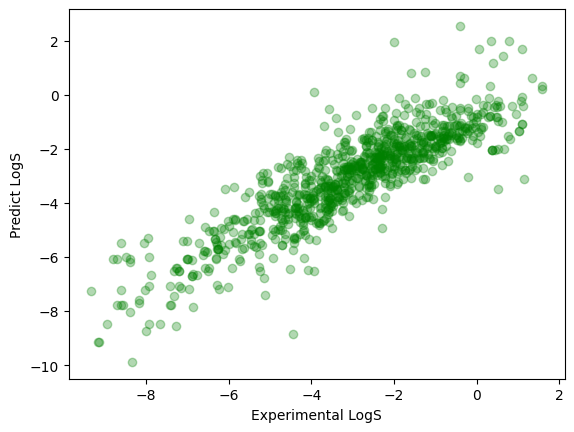

In [66]:
#import matplotlib.pyplot to plot and show graph
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(x=y_train, y=y_lr_train_pred, c= "Green",alpha=0.3)

plt.plot
plt.ylabel('Predict LogS')
plt.xlabel('Experimental LogS')

Text(0.5, 0, 'Experimental LogS')

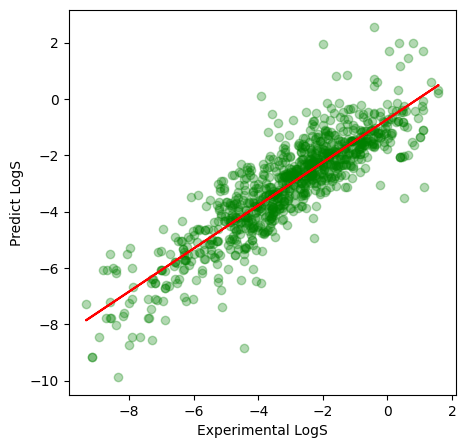

In [70]:
#Import numpy to draw the fitted line
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c= "Green",alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), c="red")
plt.ylabel('Predict LogS')
plt.xlabel('Experimental LogS')